In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1)


In [3]:
df1 = pd.read_csv('customer_details.csv')
df2 = pd.read_csv('customer_policy_details.csv') 

col1=['Id','Gender','Age','Driving licence Active','Region code','Previously Insured','Vehical Age','Vehical Damage']
df1.columns=col1
df1.head()

,Id,Gender,Age,Driving licence Active,Region code,Previously Insured,Vehical Age,Vehical Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [4]:
col2=['Id','Annual Salary','Sale Channel code','Vintage','Response']
df2.columns=col2
df2.head()

,Id,Annual Salary,Sale Channel code,Vintage,Response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [5]:
df1_n = df1.isnull()
for i in df1_n.columns.values.tolist():
    print(i)
    print(df1_n[i].value_counts())
    print('')

Id
False    380723
True        386
Name: Id, dtype: int64

Gender
False    380741
True        368
Name: Gender, dtype: int64

Age
False    380741
True        368
Name: Age, dtype: int64

Driving licence Active
False    380716
True        393
Name: Driving licence Active, dtype: int64

Region code
False    380717
True        392
Name: Region code, dtype: int64

Previously Insured
False    380728
True        381
Name: Previously Insured, dtype: int64

Vehical Age
False    380728
True        381
Name: Vehical Age, dtype: int64

Vehical Damage
False    380702
True        407
Name: Vehical Damage, dtype: int64



In [6]:
df2_n = df2.isnull()
for i in df2_n.columns.values.tolist():
    print(i)
    print(df2_n[i].value_counts())
    print('')

Id
False    380722
True        387
Name: Id, dtype: int64

Annual Salary
False    380763
True        346
Name: Annual Salary, dtype: int64

Sale Channel code
False    380709
True        400
Name: Sale Channel code, dtype: int64

Vintage
False    380721
True        388
Name: Vintage, dtype: int64

Response
False    380748
True        361
Name: Response, dtype: int64



In [8]:
df1.dropna(subset=['Id'],axis=0,inplace=True)
df1.reset_index(drop=True,inplace=True)

df2.dropna(subset=['Id'],axis=0,inplace=True)
df2.reset_index(drop=True,inplace=True)

df1['Age'].fillna(df1['Age'].mean(),inplace = True)
df1['Region code'].fillna(df1['Region code'].mean(),inplace = True)

df1.head()


,Id,Gender,Age,Driving licence Active,Region code,Previously Insured,Vehical Age,Vehical Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [7]:
df2['Annual Salary'].fillna(df2['Annual Salary'].mean(),inplace=True)
df2['Sale Channel code'].fillna(df2['Sale Channel code'].mean(),inplace=True)
df2['Vintage'].fillna(df2['Vintage'].mean(),inplace=True)

df2.head()


,Id,Annual Salary,Sale Channel code,Vintage,Response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [9]:
df1['Driving licence Active'].fillna(df1['Driving licence Active'].mode()[0],inplace=True)
df1['Previously Insured'].fillna(df1['Previously Insured'].mode()[0],inplace=True)

df1.head()


,Id,Gender,Age,Driving licence Active,Region code,Previously Insured,Vehical Age,Vehical Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [10]:
df2['Response'].fillna(df2['Response'].mode()[0],inplace=True)
df2.head()

,Id,Annual Salary,Sale Channel code,Vintage,Response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


## 2)


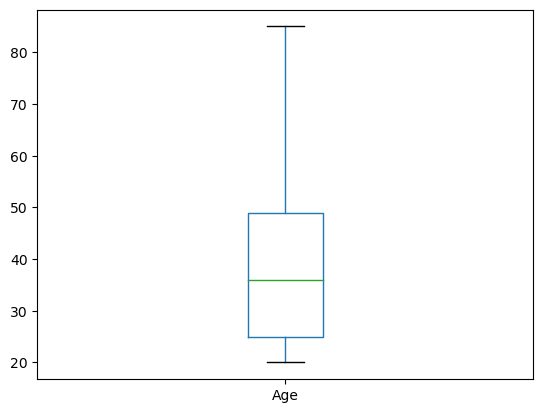

In [11]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show

plot_boxplot(df1,'Age')

In [13]:
plot_boxplot(df1,'Region code')

In [14]:
def finding_out(df):
    q1= df.quantile(0.25)
    q3= df.quantile(0.75)
    iqr=q3-q1
    outlier = df[((df<(q1-1.5*iqr)))|(df>(q3+1.5*iqr))]
    return outlier

outliers = finding_out(df1['Region code'])
print('Number of outerliers: ',len(outliers))
print('Max Number of outerliers: ',outliers.max())
print('Minimum Number of outerliers: ',outliers.min())


Number of outerliers:  0
Max Number of outerliers:  nan
Minimum Number of outerliers:  nan


In [18]:
plot_boxplot(df2,'Annual Salary')

In [19]:
plot_boxplot(df2,'Sale Channel code')

In [20]:
plot_boxplot(df2,'Vintage')

In [16]:
print('Annual Salary')
outliers = finding_out(df2['Annual Salary'])
print('Number of outliers:',len(outliers))
print('Max Number of outliers:',outliers.max())
print('Minimum outlier value:',outliers.min())
print('**'*20)
print('Sale Channel code')
outliers = finding_out(df2['Sale Channel code'])
print("Number of outliers:",len(outliers))
print("Max Number of outliers:",outliers.max())
print("Minimum outlier value:",outliers.min())
print('**'*20)
print("For Vintage")
outliers = finding_out(df2['Vintage'])
print("Number of outliers:",len(outliers))
print("Max Number of outliers:",outliers.max())
print("Minimum outlier value:",outliers.min())
print('**'*20)

Annual Salary
Number of outliers: 10332
Max Number of outliers: 540165.0
Minimum outlier value: 61858.0
****************************************
Sale Channel code
Number of outliers: 0
Max Number of outliers: nan
Minimum outlier value: nan
****************************************
For Vintage
Number of outliers: 0
Max Number of outliers: nan
Minimum outlier value: nan
****************************************


In [17]:
def replace(df):
    q1 = df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    upper = df[~(df>(q3+1.5*iqr))].max()
    lower = df[~(df>(q3+1.5*iqr))].min()
    return df
replace(df2['Annual Salary'])

0         40454.0
1         33536.0
2         38294.0
3         28619.0
4         27496.0
           ...   
380717    30170.0
380718    40016.0
380719    35118.0
380720    44617.0
380721    41777.0
Name: Annual Salary, Length: 380722, dtype: float64

In [18]:
df1.apply(lambda x:x.str.strip() if x.dtype == 'object'else x)

,Id,Gender,Age,Driving licence Active,Region code,Previously Insured,Vehical Age,Vehical Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
380718,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
380719,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
380720,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
380721,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [19]:
df1.apply(lambda x:x.str.upper() if x.dtype == 'object'else x)

,Id,Gender,Age,Driving licence Active,Region code,Previously Insured,Vehical Age,Vehical Damage
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,NO
...,...,...,...,...,...,...,...,...
380718,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,NO
380719,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,NO
380720,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,NO
380721,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,YES


In [20]:
dummy_variable_1 = pd.get_dummies(df1['Vehical Damage'])

dummy_variable_1.rename(columns={'No':'vehicale-damage-No','Yes':'vehicle-damage-Yes'},inplace = True)

dummy_variable_1.head()

,vehicale-damage-No,vehicle-damage-Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


##  3)

In [21]:
master_data = pd.merge(df1,df2,on='Id')
master_data

,Id,Gender,Age,Driving licence Active,Region code,Previously Insured,Vehical Age,Vehical Damage,Annual Salary,Sale Channel code,Vintage,Response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.0
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.0
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.0
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.0


## 4)

In [22]:
all_data = master_data.groupby('Gender')['Annual Salary'].mean()
all_data


Gender
Female    30492.028478
Male      30624.622150
Name: Annual Salary, dtype: float64

In [23]:
all_data.plot()

<AxesSubplot:xlabel='Gender'>

In [24]:
all_data.plot.bar(title='Gender vs Annual Salary')

<AxesSubplot:title={'center':'Gender vs Annual Salary'}, xlabel='Gender'>

In [25]:
age_data =master_data.groupby('Age')['Annual Salary'].mean() 
age_data

Age
20.0    26924.620173
21.0    30564.475810
22.0    30823.778102
23.0    30688.606298
24.0    31183.802890
            ...     
81.0    31201.571429
82.0    37705.379310
83.0    31012.727273
84.0    35440.818182
85.0    29792.363636
Name: Annual Salary, Length: 67, dtype: float64

In [26]:
age_data.plot()

<AxesSubplot:title={'center':'Gender vs Annual Salary'}, xlabel='Age'>

In [27]:
age_data.plot.bar()

<AxesSubplot:title={'center':'Gender vs Annual Salary'}, xlabel='Age'>

In [28]:
master_data.groupby('Gender').count()

,Id,Age,Driving licence Active,Region code,Previously Insured,Vehical Age,Vehical Damage,Annual Salary,Sale Channel code,Vintage,Response
Gender,,,,,,,,,,,
Female,174485,174485,174485,174485,174485,174309,174300,174485,174485,174485,174485
Male,205484,205484,205484,205484,205484,205279,205266,205484,205484,205484,205484


In [29]:
vehical_age =master_data.groupby('Vehical Age')['Annual Salary'].mean()
vehical_age

Vehical Age
1-2 Year     30522.464972
< 1 Year     30115.716367
> 2 Years    35657.520845
Name: Annual Salary, dtype: float64

In [30]:
vehical_age.plot()

<AxesSubplot:title={'center':'Gender vs Annual Salary'}, xlabel='Vehical Age'>

In [31]:
vehical_age.plot.bar()

<AxesSubplot:title={'center':'Gender vs Annual Salary'}, xlabel='Vehical Age'>

## 5)


In [32]:
master_data['Age'].corr(master_data['Annual Salary'])

0.0677151598661391

In [33]:
master_data[['Age','Annual Salary']].corr()

,Age,Annual Salary
Age,1.000000,0.067715
Annual Salary,0.067715,1.000000
